In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np # 이미지는 기본적으로 2차원 배열이기 때문
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


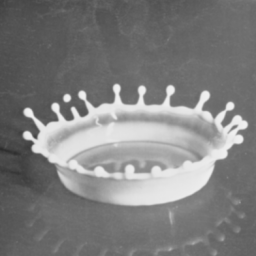

In [37]:
# img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/lena256.jpg')
# img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/rice.bmp')
# img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/cell.bmp')
# img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/cell-bright.bmp')
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/milkdrop.bmp')

print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gImg)

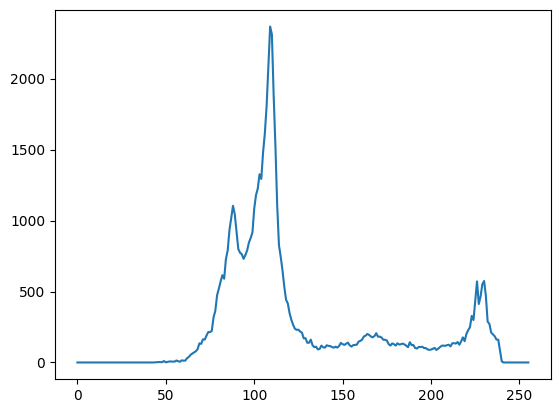

In [38]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 255])
plt.plot(hist)

In [12]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.ubyte)

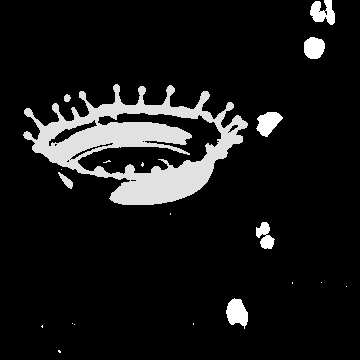

In [39]:
Threshold = 180
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if gImg[h, w] > Threshold:
      gBin[h, w] = 225
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

In [31]:
T1 = 150
T2 = 0
T0 = 1

In [26]:
def threshold_update(img, bimg, h, w, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(gImg.shape[0]):
    for w in range(gImg.shape[1]):
      if(img[h, w] == 0):
        sum1 += np.int32(sum1 + img[h, w])
        count1 += 1
      else:
        sum2 += np.int32(sum2 + img[h, w])
        count2 += 1

  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1 + avg2)/2
  return T

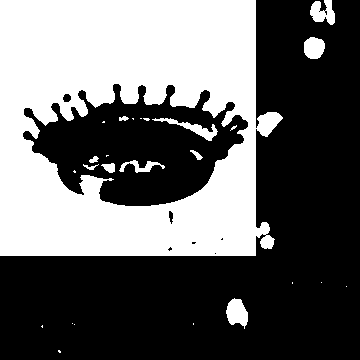

In [40]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if gImg[h, w] > T1:
          gBin[h, w] = 0
    else:
          gBin[h, w] = 255

cv2_imshow(gBin)

In [36]:
while True:
  T2 = threshold_update(gImg, gBin)
  print(T2)

  if np.abs(T1 - T2) < T0:
    break
  else:
    T1 = T2
    for h in range(gImg.shape[0]):
      for w in range(gImg.shape[1]):
        if gImg[h, w] > T1:
          gBin[h, w] = 255
        else:
          gBin[h, w] = 0

print(T1)
cv2_imshow(gBin)

TypeError: threshold_update() missing 3 required positional arguments: 'h', 'w', and 'T1'